### COMP9517 24T3 Lab 04

Jinghan Wang (z5286124)

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import reconstruction, remove_small_objects
from skimage.measure import label

In [105]:
def process_image(image, lowerb=180, upperb=200, kernel_size=3, min_size=2000):
    """
    lowerb: lower bound for intensity thresholding
    upperb: upper bound for intensity thresholding
    kernel_size: size of the kernel for morphological operations
    min_size: minimum size of the objects to keep
    """
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    
    # Convert the input image to grayscale, apply intensity thresholding
    thresh = cv2.inRange(image, lowerb=lowerb, upperb=upperb)
    
    # Set the remaining objects that are smaller than some size threshold to black
    label_image = label(thresh)
    filtered_image = remove_small_objects(label_image, min_size=min_size)
    final_image = (filtered_image > 0).astype(np.uint8) * 255
    
    # Use binary reconstruction and subtraction to get rid of segmented objects touching the image boundary
    seed = np.zeros_like(final_image)
    seed[0, :] = final_image[0, :]
    seed[-1, :] = final_image[-1, :]
    seed[:, 0] = final_image[:, 0]
    seed[:, -1] = final_image[:, -1] 
    
    opened_image_normalized = final_image / 255.0
    seed_normalized = seed / 255.0

    reconstructed_image = reconstruction(seed_normalized, opened_image_normalized, method='dilation')

    cleaned_image = opened_image_normalized - reconstructed_image
    cleaned_image = np.clip(cleaned_image, 0, 1)
    cleaned_image = (cleaned_image * 255).astype(np.uint8)
    
    # Use binary morphology operators to fill any holes and filter out noise pixels in the segmentation
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    closed_image = cv2.morphologyEx(cleaned_image, cv2.MORPH_CLOSE, kernel)
    opened_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel)
    
    plt.imshow(opened_image, cmap='gray')
    plt.axis('off')
    plt.show()
    
    # Count and Print the final number of objects
    labeled_image = label(opened_image, connectivity=2)
    num_objects = np.max(labeled_image)
    print(f'Number of objects: {num_objects}')

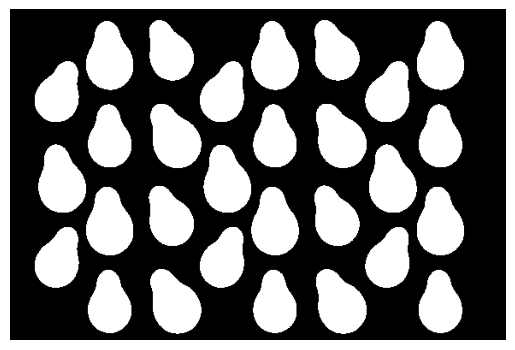

Number of objects: 29


In [106]:
process_image(
    image='Images/Avocados.jpg', 
    lowerb=10, 
    upperb=220,
    kernel_size=3,
    min_size=2000
)

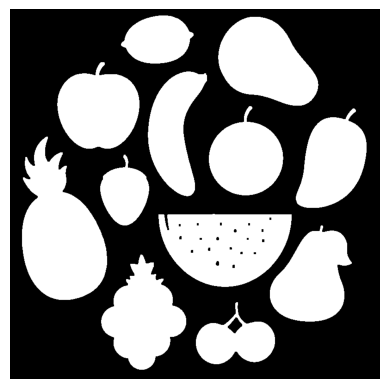

Number of objects: 12


In [107]:
process_image(
    image='Images/Fruits.jpg', 
    lowerb=50, 
    upperb=240,
    kernel_size=4,
    min_size=2500
)

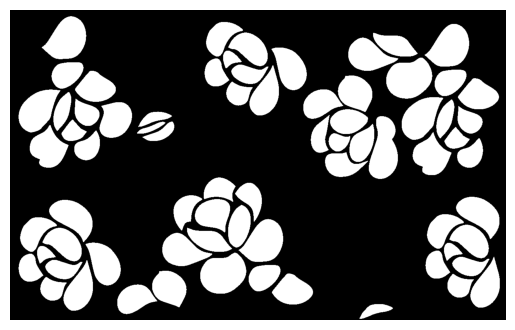

Number of objects: 72


In [108]:
process_image(
    image='Images/Leaves.png', 
    lowerb=120, 
    upperb=200,
    kernel_size=2,
    min_size=100
)